# Assignment Two

CS529

Adrien Clay

Christopher Jarek

Thomas Hynes

Refat Mishuk

In [17]:
from make_classification import make_classification
import matplotlib.pyplot as plt
from plot_decision_regions import plot_decision_regions
from sklearn.metrics import classification_report
from linear_svc import LinearSVC as LinSVC
import numpy as np
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import time

RANDOM_STATE = 42
EPOCHS = 30

## 1. LinearSVC Implementation in Python

The `LinearSVC` class in `linear_svc.py` will be aliased as `LinSVC` to avoid confusion with Sklearn's LinearSVC class, as both will be used in this report.

`LinearSVC` contains a function `fit(self, X, y)` adapted directly from `AdalineGD` that does the following:

1. **Instantiate random normal weight vector and bias values**

2. **Create an array to track losses**

3. **Calculate Hinge Loss**

The hinge loss was calculated using the equations directly from the slides as:
$$
L_i = max(0, 1- y \times \widehat{y})
$$
$$
L_{norm} = \frac{\lambda}{2n}||\bar{w}^2|| = \frac{\lambda}{2n}\sum_{j=3}^m w_j^2
$$
$$
Loss = \frac{C}{n} \times \sum L_i + L_{norm}
$$

Each misclassified sample then contributes to the weight vector utilizing the deriative of the cost function with respect to $w$ and $b$ respectively:

$$
w = w - \eta(-y_ix_i)
$$
$$
b = b - \eta(y_i)
$$

### 1.1 LinearSVC Demo (Imported as LinSVC)

1. Use `make_classification` to get train/test data

2. Train/Test `LinSVC`

3. Graph Losses

In [18]:
X_train, X_test, y_train, y_test, data, labels = make_classification(d=2)
lin_svc = LinSVC(n_iter=EPOCHS, C=.1, l2_param=.1, eta=.0001, random_state=RANDOM_STATE)
lin_svc.fit(X_train, y_train)
lin_svc_preds = lin_svc.predict(X_test)

print(classification_report(y_test, lin_svc_preds))


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



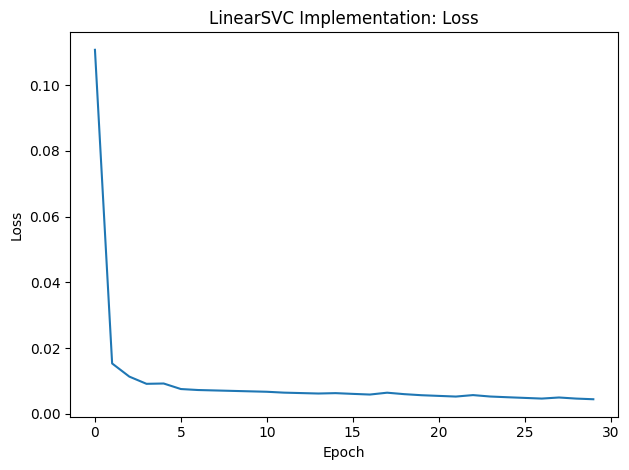

In [19]:
plt.plot(lin_svc.losses_)
plt.title("LinearSVC Implementation: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Decision boundary for LinearSVC Implementation with D = 2')

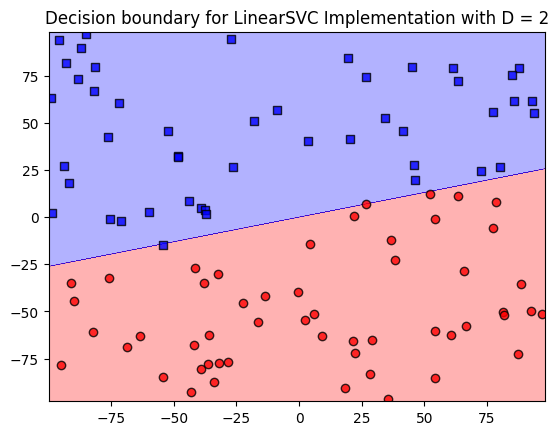

In [20]:
plot_decision_regions(data, labels, lin_svc)
plt.title("Decision boundary for LinearSVC Implementation with D = 2")

\pagebreak

## 2. Generating Linearly Separable Data

The steps to accomplish this are as follows:

1. Instantiate a random uniform array for $\bar{a}$ in range $u$ of dimension $d$

2. Create $n$ number of points of dimension $d$ from a random uniform distribution in range $u$

3. For each point, take the dot product of $\bar{a}$ and $x$. 
    - If the result is greater than 0, the label will be 1, otherwise the label will be -1.
    - We don't need to add $b$ since it is assumed to be 0.

4. Use Scikit-Learn's `train_test_split` function to split the data into training data and testing data
    - The return value will be `X_train, X_test, y_train, y_test, data, labels` where `data` and `labels` are the full, unsplit data.

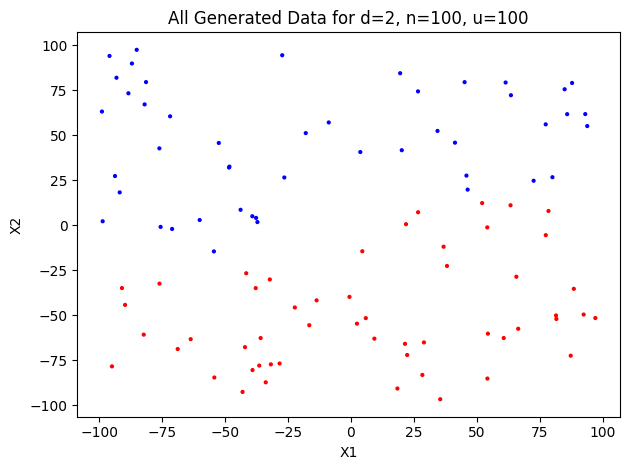

In [21]:
X_train, X_test, y_train, y_test, data, labels = make_classification(d=2, n=100, random_state=RANDOM_STATE)

# Create individual point colors based on label
c = []
for label in labels:
    c.append('b' if label == 1 else 'r')

# Extract x1 and x2 from data returned by make_classification
x1 = [point[0] for point in data]
x2 = [point[1] for point in data]

# Create scatter plot of data
plt.scatter(x1, x2, c=c, s=4)
plt.title("All Generated Data for d=2, n=100, u=100")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.show()

\pagebreak

## 3. LinearSVC Implementation Investigation

In this section we investigate the scalability of our linear_svc program with the following sizes:
d_range = [10, 50, 100, 500, 1_000]
n_range = [500, 1_000, 5_000, 10_000, 100_000]

We collected data for each combination of the above d and n ranges by training and testing our svc model on each one. We then recorded the time and accuracy data for each of the 25 combinations and compiled them into bar graphs for easy comparison.
As expected, training our model with d=1_000, n=100_000 takes the longest amount of time, a more significant observation is that our model performs at similar timescales for any d but depending more heavily on n.

Analyzing our collected data for accuracy for each d,n combination, we can observe that the required n size increases significanlyt for each additional d. For example, looking at the d=1000 portion of our graph, we achieve a very low accuracy with n<=5000, however the same n value results in a high accuracy for d<=100.
For example, if we wanted to require an accuracy of 95% in each model, we would require the following minimum n for each d:
d = 10   | n >= 500
d = 50   | n >= 1000
d = 100  | n >= 5000
d = 500  | n >= 10000
d = 1000 | n >= 100000

Including such an accuracy requirement when creating a model can inform the minimum acceptable sample size required to train it.

                 d_n      time  accuracy
0        d:10, n:500  0.025518  0.993333
1       d:10, n:1000  0.047096  0.993333
2       d:10, n:5000  0.227417  0.994000
3      d:10, n:10000  0.439774  0.993333
4     d:10, n:100000  4.148057  0.996067
5        d:50, n:500  0.029001  0.893333
6       d:50, n:1000  0.053783  0.983333
7       d:50, n:5000  0.236315  0.983333
8      d:50, n:10000  0.454089  0.985000
9     d:50, n:100000  4.359255  0.992633
10      d:100, n:500  0.030172  0.826667
11     d:100, n:1000  0.055998  0.940000
12     d:100, n:5000  0.246528  0.974667
13    d:100, n:10000  0.465615  0.978333
14   d:100, n:100000  4.351727  0.989533
15      d:500, n:500  0.028009  0.653333
16     d:500, n:1000  0.054111  0.726667
17     d:500, n:5000  0.282103  0.920000
18    d:500, n:10000  0.606828  0.955000
19   d:500, n:100000  5.125669  0.982167
20     d:1000, n:500  0.030115  0.646667
21    d:1000, n:1000  0.064750  0.700000
22    d:1000, n:5000  0.350344  0.878000
23   d:1000, n:1

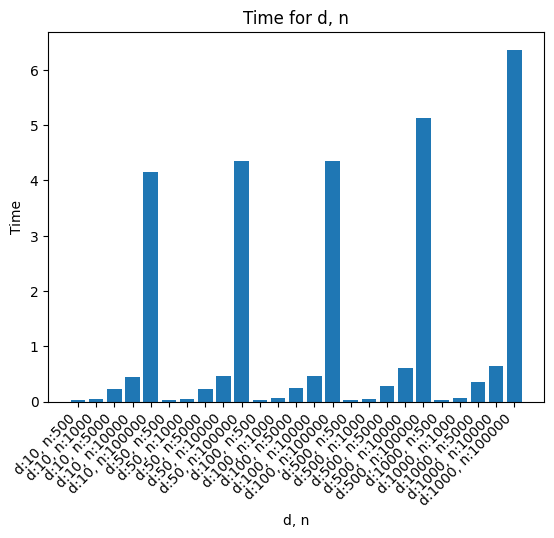

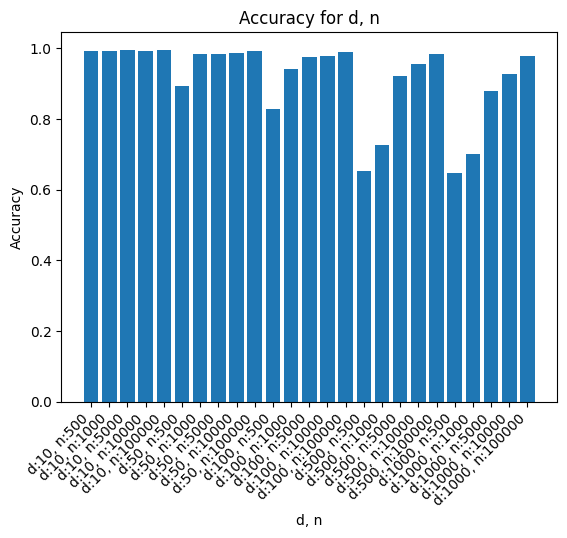

In [ ]:
d_range = [10, 50, 100, 500, 1_000]
n_range = [500, 1_000, 5_000, 10_000, 100_000]
combinations = [[d, n] for d in d_range for n in n_range]
d_n = []
time_data = []
accuracy_data = []

for c in combinations:
    d = c[0]
    n = c[1]
    
    
    X_train, X_test, y_train, y_test, _, _ = make_classification(d=d, n=n)
    lin_svc = LinSVC(n_iter=EPOCHS, C=.1, l2_param=.1, eta=.0001, random_state=RANDOM_STATE)
    
    t = time.time()
    
    lin_svc.fit(X_train, y_train)
    lin_svc_preds = lin_svc.predict(X_test)

    t = time.time() - t
    acc = np.sum(lin_svc_preds == y_test) / len(y_test)
    
    d_n.append(f"d:{d}, n:{n}")
    time_data.append(t)
    accuracy_data.append(acc)

df_data = pd.DataFrame(zip(d_n, time_data, accuracy_data), columns=["d_n", "time", "accuracy"])
print(df_data)

plt.bar(d_n, time_data)
plt.xlabel("d, n")
plt.ylabel("Time")
plt.title("Time for d, n")
plt.xticks(rotation=45, ha="right")
plt.show()

plt.bar(d_n, accuracy_data)
plt.xlabel("d, n")
plt.ylabel("Accuracy")
plt.title("Accuracy for d, n")
plt.xticks(rotation=45, ha="right")
plt.show()

\pagebreak

## 4. Sklearn LinearSVC Investigation

> Investigate training times and scores for varying $d$ and $n$ combinations.

After looking at the data, we found that there was no significant difference in accuracy between the two models. The primary difference we found was in the training time with the duel problem SVC taking much longer on larger data sets over the primal SVC.

1. For large values of $n$, training time increases

    - When $n$ is large, training time increases significantly but one interesting outlier is $d=100, n=100000$.
    - This might imply that for Scikit-Learn's implementation, the number of features plays a more significant role in the training loop, meaning that lower feature counts might result in reduced training time.

    - It also appears that the primal problem takes less training time in some cases over the dual problem.

2. No clear pattern differences for score.

    - It does not appear that there is any discernable patterns for accuracy across varying $d$ and $n$ combinations. 
    - Perhaps the models get worse in performce over increasing $d,n$ combinations but I'd say the result are too ambiguous to conclude this. They were certainly worse for three particular combinations of $d,n$
    - It does not appear there are significant differences in patterns across problems for varying $d$ and $n$ combinations. Both problems appear to follow a similar trajectory

>
![Accuracy Plot](accuracy_plot.png "Accuracy Plot")

![Training Time Plot](time_plot.png "Training Time Plot")

In [ ]:
def eval(X_train, X_test, y_train, y_test, dual):
    model = LinearSVC(dual=dual, loss='squared_hinge' if not dual else 'hinge', random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    return train_time, accuracy

def main():
    d_values = [10, 50, 100, 500, 1000]
    n_values = [500, 1000, 5000, 10000, 100000]
    results = []

    for d in d_values:
        for n in n_values:
            X_train, X_test, y_train, y_test, _, _ = make_classification(d=d, n=n, u=100, random_state=RANDOM_STATE)

            time_primal, accuracy_primal = eval(X_train, X_test, y_train, y_test, dual=False)
            time_dual, accuracy_dual = eval(X_train, X_test, y_train, y_test, dual=True)

            results.append([d, n, time_primal, accuracy_primal, time_dual, accuracy_dual])

    out = pd.DataFrame(results, columns=["D", "N", "Time Primal", "Accuracy Primal", "Time Dual", "Accuracy Dual"])
    out.to_csv("svm_comparison_results.csv", index=False)
    print(out)

    # Times
    plt.figure(figsize=(10, 5))
    plt.bar(out.index - 0.2, out["Time Primal"], width=0.4, label="Time Primal", color='blue')
    plt.bar(out.index + 0.2, out["Time Dual"], width=0.4, label="Time Dual", color='red')
    plt.xlabel("Dataset")
    plt.ylabel("Training Time (seconds)")
    plt.title("Time")
    plt.legend()
    plt.xticks(out.index, [f"d={d}, n={n}" for d, n in zip(out["D"], out["N"])], rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("time_plot.png")
    plt.show()

    # Accuracy
    plt.figure(figsize=(10, 5))
    plt.bar(out.index-0.2, out["Accuracy Primal"], width=0.4, label="Time Primal", color='blue')
    plt.bar(out.index+0.2, out["Accuracy Dual"], width=0.4, label="Time Dual", color='red')
    plt.xlabel("Dataset")
    plt.ylabel("Accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.xticks(out.index, [f"d={d}, n={n}" for d, n in zip(out["D"], out["N"])], rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig("accuracy_plot.png")
    plt.show()